# City of New York Complaint Problems

## Data Source

* City of New York complaint problems dataset is publicly available from the website data.gov via the link:

https://catalog.data.gov/dataset/complaint-problems-7052e

* Data published by: data.cityofnewyork.us
* Data last updated: 6 September 2019

## Data Dictionary

#### There were 18 variables within the data set with 1045040 rows 

* ProblemID
* ComplaintID
* UnitTypeID
* UnitType
* SpaceTypeID 
* SpaceType
* TypeID
* Type
* MajorCategoryID
* MajorCategory
* MinorCategoryID
* MinorCategory
* CodeID
* Code
* StatusID
* Status
* StatusDate
* StatusDescription

### Tasks:

#### 1. Insights from the dataset 
* Exploratory Data Analysis

#### 2. Build a machine learning model that performs MultiClass classification to predict the outcome of complaint type
* Type: 1=EMERGENCY 2=HARZARDOUS 3=IMMEDIATE EMERGENCY 4=NON EMERGENCY 
* StatusDescription
* UnitType
* SpaceType
* MajorCategory
* MinorCategory
* Code
* Status
* StatusDate


## Problem Statements 

* 1. Uncover the key topics from the complaint status description and,
* 2. Exploratory Data Analysis
* 3. Classify New York City complaints  types into 4 pre-defined classes. 
- The problem is supervised multiclass text classification problem, and the task is to investigate which supervised machine learning method is best suited to solve it.
- Given a new complaint comes in, we want to assign it to one of 4 categories. The classifier makes the assumption that each new complaint is assigned to one and only one category. 

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn import datasets
import statsmodels.formula.api as smf
import matplotlib.cm as cm
import statsmodels.api as sm

# Show plots inside a notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
## Load the data into a Pandas Dataframe from csv file
import pandas as pd
df = pd.read_csv('Complaint_Problems.csv')
#### Inspect the first 5 values of the dataset
df.head()

,ProblemID,ComplaintID,UnitTypeID,UnitType,SpaceTypeID,SpaceType,TypeID,Type,MajorCategoryID,MajorCategory,MinorCategoryID,MinorCategory,CodeID,Code,StatusID,Status,StatusDate,StatusDescription
0,17307278,8412850,91,APARTMENT,543,ENTIRE APARTMENT,1,EMERGENCY,56,DOOR/WINDOW,337,WINDOW FRAME,2836,LOOSE OR DEFECTIVE,2,CLOSE,03/31/2017,The Department of Housing Preservation and Dev...
1,17317058,8417365,91,APARTMENT,543,ENTIRE APARTMENT,3,NON EMERGENCY,63,UNSANITARY CONDITION,376,PESTS,2821,MICE,2,CLOSE,03/16/2017,The Department of Housing Preservation and Dev...
2,17016467,8249017,91,APARTMENT,545,ENTRANCE/FOYER,1,EMERGENCY,56,DOOR/WINDOW,333,DOOR,2665,LOCK BROKEN OR MISSING,2,CLOSE,03/03/2017,The Department of Housing Preservation and Dev...
3,14548958,6967900,91,APARTMENT,541,BATHROOM,1,EMERGENCY,9,PLUMBING,63,BATHTUB/SHOWER,2538,BROKEN OR MISSING,2,CLOSE,07/29/2014,The Department of Housing Preservation and De...
4,14548959,6967900,91,APARTMENT,541,BATHROOM,3,NON EMERGENCY,9,PLUMBING,63,BATHTUB/SHOWER,2540,FAUCET BROKEN/MISSING/LEAKING,2,CLOSE,08/04/2014,The Department of Housing Preservation and De...


In [3]:
## Exploratory Data Analysis

#### Create a new dataframe forexploratory data analysis

df2 = df[['MajorCategory','Code','Status','StatusDate', 'Type', 'MinorCategory']]

df2.head()

,MajorCategory,Code,Status,StatusDate,Type,MinorCategory
0,DOOR/WINDOW,LOOSE OR DEFECTIVE,CLOSE,03/31/2017,EMERGENCY,WINDOW FRAME
1,UNSANITARY CONDITION,MICE,CLOSE,03/16/2017,NON EMERGENCY,PESTS
2,DOOR/WINDOW,LOCK BROKEN OR MISSING,CLOSE,03/03/2017,EMERGENCY,DOOR
3,PLUMBING,BROKEN OR MISSING,CLOSE,07/29/2014,EMERGENCY,BATHTUB/SHOWER
4,PLUMBING,FAUCET BROKEN/MISSING/LEAKING,CLOSE,08/04/2014,NON EMERGENCY,BATHTUB/SHOWER


In [4]:
y = df2['Type'].values
y.shape

(3381340,)

In [5]:
## Class label encoding - Transform categorical variables for Machine Learning
#### Encode class labels

from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
l_encoder.fit(y)
l_encoder.classes_

array(['EMERGENCY', 'HAZARDOUS', 'IMMEDIATE EMERGENCY', 'NON EMERGENCY'],
      dtype=object)

In [6]:
y_enc = l_encoder.transform(y)
np.unique(y_enc)

array([0, 1, 2, 3])

In [10]:
np.unique(l_encoder.inverse_transform(y_enc))

array(['EMERGENCY', 'HAZARDOUS', 'IMMEDIATE EMERGENCY', 'NON EMERGENCY'],
      dtype=object)

In [11]:
# Use Scikit-learn estimators for classification convert labels to integers internally
# we enumerate the class labels starting at 0:

import numpy as np

MajorCategory_mapping = {label:idx for idx,label in
                enumerate(np.unique(df2['MajorCategory']))}
MajorCategory_mapping
{'DOOR/WINDOW':0,'UNSANITARY CONDITION':1,'PLUMBING':2,'FLOORING/STAIRS':3,'HEAT/HOT WATER':4,'PAINT/PLASTER':5, 'ELECTRIC':6, 'GENERAL':7, 'WATER LEAK':8,'APPLIANCE':9, 'NONCONST':10, 'OUTSIDE BUILDING':11,'SAFETY':12,'HEATING':13, 'ELEVATOR':14, 'CONSTRUCTION':15}  

Status_mapping = {label:idx for idx,label in
                enumerate(np.unique(df2['Status']))}
Status_mapping
{'CLOSE':0,'OPEN':1}

Type_mapping = {label:idx for idx,label in
                enumerate(np.unique(df2['Type']))}
Type_mapping
{'EMERGENCY':0,'NON EMERGENCY':1, 'IMMEDIATE EMERGENCY':2, 'HARZARDOUS':3}

{'EMERGENCY': 0, 'NON EMERGENCY': 1, 'IMMEDIATE EMERGENCY': 2, 'HARZARDOUS': 3}

In [12]:
## Summarize the dataframe

df2.describe()

,MajorCategory,Code,Status,StatusDate,Type,MinorCategory
count,3381340,3228397,3381340,3380777,3381340,3381340
unique,16,241,2,2787,4,78
top,HEAT/HOT WATER,NO HEAT,CLOSE,02/18/2016,EMERGENCY,ENTIRE BUILDING
freq,1093678,653401,3338424,5664,2084124,712115


In [13]:
## Data Pre-Processing

#### We are interested in examining two columns — “Type” and “StatusDescription”.
#### * Input: StatusDescription
#### * Example: “  The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.”
#### * Output: Type
#### * Example: NON EMERGENCY
#### Missing values are removed from “StatusDescription” column, and add a column encoding the product as an integer because categorical variables are often better represented by integers than strings.

#### After cleaning up, this is the first five rows of the data we will be working on:

from io import StringIO
col = ['Type', 'StatusDescription']
df = df[col]
df = df[pd.notnull(df['StatusDescription'])]

df.columns = ['Type', 'StatusDescription']

df['TypeID'] = df['Type'].factorize()[0]
TypeID_df = df[['Type', 'TypeID']].drop_duplicates().sort_values('TypeID')

Type_to_id = dict(TypeID_df.values)
id_to_Type = dict(TypeID_df[['TypeID', 'Type']].values)

df.head()

,Type,StatusDescription,TypeID
0,EMERGENCY,The Department of Housing Preservation and Dev...,0
1,NON EMERGENCY,The Department of Housing Preservation and Dev...,1
2,EMERGENCY,The Department of Housing Preservation and Dev...,0
3,EMERGENCY,The Department of Housing Preservation and De...,0
4,NON EMERGENCY,The Department of Housing Preservation and De...,1


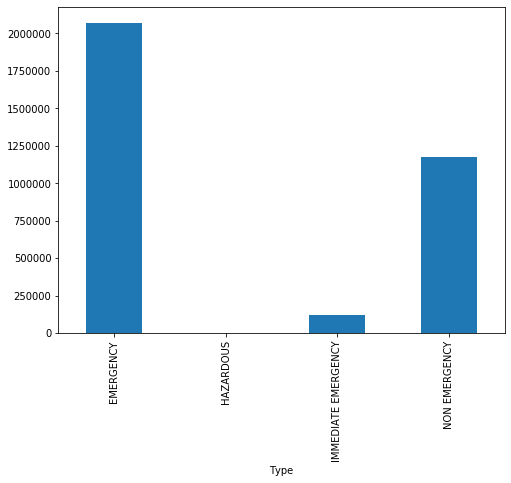

In [15]:
## Imbalanced Classes

#### address imbalanced classes with resampling methods, impute missing values, obtain more data

#### We can see that complaint types are biased towards the complaint type 'EMERGENCY'

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Type').StatusDescription.count().plot.bar(ylim=0)
plt.show()

#### Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

## Text Representation

#### The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. Therefore, during the preprocessing step, the texts are converted to a more manageable representation.
#### One common approach for extracting features from text is to use the bag of words model: a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.
#### Specifically, for each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf. We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of consumer complaint narratives:

#### * sublinear_df is set to True to use a logarithmic form for frequency.
#### * min_df is the minimum numbers of documents a word must be present in to be kept.
#### * norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
#### * ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
#### * stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.StatusDescription).toarray()
labels = df.TypeID

features.shape

#### Now, each of 1045040 complaint status description is represented by 241 features, representing the tf-idf score for different unigrams and bigrams.

(3364529, 247)

In [17]:
## Find the terms that are the most correlated with each of the products:

from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Type, TypeID in sorted(Type_to_id.items()):
  features_chi2 = chi2(features, labels == TypeID)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Type))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'EMERGENCY':
  . Most correlated unigrams:
. heat
. building
  . Most correlated bigrams:
. hot water
. heat hot
# 'HAZARDOUS':
  . Most correlated unigrams:
. nyc
. gov
  . Most correlated bigrams:
. nyc gov
. www nyc
# 'IMMEDIATE EMERGENCY':
  . Most correlated unigrams:
. heat
. violations
  . Most correlated bigrams:
. violations issued
. issued complaint
# 'NON EMERGENCY':
  . Most correlated unigrams:
. heat
. building
  . Most correlated bigrams:
. heat hot
. hot water


In [18]:
# Multi-Class Classifier: Features and Design

#### To train supervised classifiers, we first transformed the “StatusDesscription” into a vector of numbers. We explored vector representations such as TF-IDF weighted vectors.
#### After having this vector representations of the text we can train supervised classifiers to train unseen “Consumer complaint narrative” and predict the “product” on which they fall.
#### After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.

## Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['StatusDescription'], df['Type'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [19]:
## After fitting the training set, let’s make some predictions to predict the status of the complaint type:

print(clf.predict(count_vect.transform([" The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd."])))


['NON EMERGENCY']


In [20]:
df[df['StatusDescription'] == " The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed."]


,Type,StatusDescription,TypeID
8,IMMEDIATE EMERGENCY,The Department of Housing Preservation and De...,2
9,NON EMERGENCY,The Department of Housing Preservation and De...,1
12,IMMEDIATE EMERGENCY,The Department of Housing Preservation and De...,2
13,EMERGENCY,The Department of Housing Preservation and De...,0
15,EMERGENCY,The Department of Housing Preservation and De...,0
...,...,...,...
3381323,NON EMERGENCY,The Department of Housing Preservation and De...,1
3381325,EMERGENCY,The Department of Housing Preservation and De...,0
3381332,NON EMERGENCY,The Department of Housing Preservation and De...,1
3381335,EMERGENCY,The Department of Housing Preservation and De...,0


In [21]:
print(clf.predict(count_vect.transform(["More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."])))

['EMERGENCY']


In [22]:
df[df['StatusDescription'] == "The Department of Housing Preservation and Development responded to a complaint of no heat or hot water and was advised by a tenant in the building that heat and hot water had been restored. If the condition still exists, please file a new complaint."]


,Type,StatusDescription,TypeID
11,EMERGENCY,The Department of Housing Preservation and Dev...,0
62,EMERGENCY,The Department of Housing Preservation and Dev...,0
69,EMERGENCY,The Department of Housing Preservation and Dev...,0
86,EMERGENCY,The Department of Housing Preservation and Dev...,0
186,EMERGENCY,The Department of Housing Preservation and Dev...,0
...,...,...,...
3211272,EMERGENCY,The Department of Housing Preservation and Dev...,0
3211354,EMERGENCY,The Department of Housing Preservation and Dev...,0
3211376,EMERGENCY,The Department of Housing Preservation and Dev...,0
3211382,EMERGENCY,The Department of Housing Preservation and Dev...,0


# Model Selection

### We are now ready to experiment with different machine learning models, evaluate their accuracy and find the source of any potential issues.
### We will benchmark the following four models:

#### 1. Logistic Regression
#### 2. (Multinomial) Naive Bayes
#### 3. Linear Support Vector Machine
#### 4. Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

## Model

#### MultinomialNB and LinearSVC  perform better than the other two classifiers, with MultinomialNB having a slight advantage with a median accuracy of around 64%.

# Model Evaluation

#### Continue with our best model (MultinomialNB), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

In [ ]:
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=TypeID_df.Type.values, yticklabels=TypeID_df.Type.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#### The vast majority of the predictions end up on the diagonal (predicted label = actual label), where we want them to be. However, there are a number of misclassifications, and it might be interesting to see what those are caused by:

from IPython.display import display
for predicted in TypeID_df.TypeID:
  for actual in TypeID_df.TypeID:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_Type[actual], id_to_Type[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Type', 'StatusDescription']])
      print('')

In [ ]:
#### Misclassified complaint status are complaints that touch on more than one subjects (for example, complaints involving both credit card and credit report). This sort of errors will always happen.
#### Again, we use the chi-squared test to find the terms that are the most correlated with each of the categories:
    
model.fit(features, labels)
N = 2
for Type, TypeID in sorted(Type_to_id.items()):
  indices = np.argsort(model.coef_[TypeID])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Type))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))    

In [ ]:
## They are consistent within our expectation.
#### We print out the classification report for each class:

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Type'].unique()))

In [ ]:
# Data Visualisation

#### Display the plots in the notebook with the following command
%matplotlib inline

#### Import the graphing libraries we will use
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
import seaborn as sns
sns.set(color_codes=True)

Text(0,0.5,'Type')

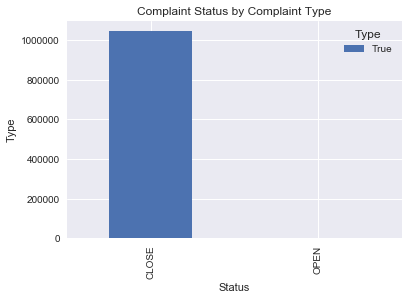

In [43]:
# Barplot of Status grouped by Type 
pd.crosstab(df2.Status, df2.Type.astype(bool)).plot(kind='bar')
plt.title('Complaint Status by Complaint Type')
plt.xlabel('Status')
plt.ylabel('Type')

# status -> True = Open, False = Closed

Text(0,0.5,'Type')

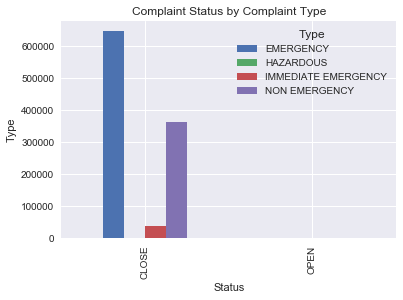

In [44]:
# Barplot of Status grouped by Type 
pd.crosstab(df2.Status, df2.Type).plot(kind='bar')
plt.title('Complaint Status by Complaint Type')
plt.xlabel('Status')
plt.ylabel('Type')


Text(0,0.5,'Type')

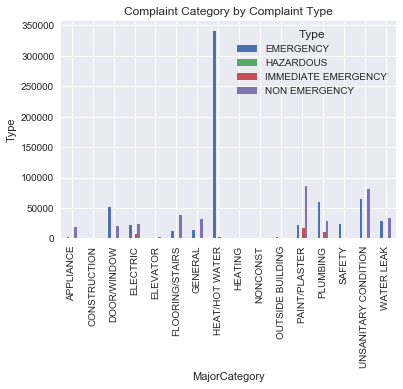

In [38]:
# Barplot of MajorCategory grouped by Type 
pd.crosstab(df2.MajorCategory, df2.Type).plot(kind='bar')
plt.title('Complaint Category by Complaint Type')
plt.xlabel('MajorCategory')
plt.ylabel('Type')

In [ ]:
# Grouped histogram of complaint status grouped by complaint status type (shows distribution for each group)

#df2.Status.hist(by=df2.Type, sharex=True,sharey=True)
#plt.xlabel('Type')
#plt.ylabel('Status')


In [ ]:
## References:
* https://scikit-learn.org/stable/modules/multiclass.html
* https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [ ]:
# The end